<a href="https://colab.research.google.com/github/real3stone/ML-Ng/blob/master/DeepLearning_TF/DLai_C2_dat_vs_dog_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

本实验是Laurence课程中的实例程序，比较有启发，保存下来！

实验内容：演示用TensorFlow中的图片Augmentation来处理过拟合的问题

实验数据：Kaggle猫狗分类数据的子集，包含3000张照片

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
    
# import
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
  
# unzip
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=1e-4),
             metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size = 20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')

history = model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs = 100,
                    validation_data = validation_generator,
                    validation_steps=50,
                    verbose=2)


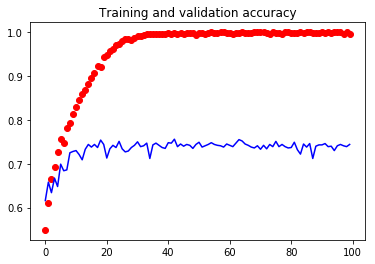

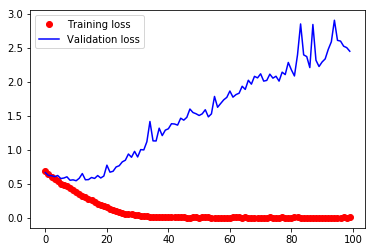

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title("Training and validation accuracy")
plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()


从acc和loss的变化图可以看出，随着epoch增加，model对training_set的准确度越来越高，但是对validation_set却没有实质提高
，可得结论：model发生了过拟合；

因此，我们加入TensorFlow提供的图片生成器，增加training_set的多样性，再看泛化效果

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

loac_zip = '/tmp/cats_and_dogs_filtered_new.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(rescale=1.0/255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                   batch_size=20,
                                                   target_size=(150,150),
                                                   class_mode='binary')
validation_generatro = test_datagen.flow_from_directory(validation_dir,
                                                 batch_size=20,
                                                 target_size=(150,150),
                                                 class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 100,
                              validation_data = validation_generator,
                              validation_steps=50,
                              verbose=2)


--2019-06-17 01:50:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered_new.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  50.1MB/s    in 1.3s    

2019-06-17 01:50:20 (50.1 MB/s) - ‘/tmp/cats_and_dogs_filtered_new.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 18s - loss: 0.6923 - acc: 0.5230 - val_loss: 0.6813 - val_acc: 0.5570
Epoch 2/100
100/100 - 16s - loss: 0.6796 - acc: 0.5760 - val_loss: 0.6498 - val_acc: 0.6590
Epoch 3/100
100/100 - 15s - loss: 0.6600 - acc: 0.5945 - val_loss: 0.6224 - val_acc: 0.6720
Epoch 4/100
100/100 - 16s - lo

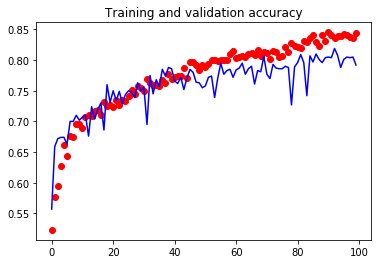

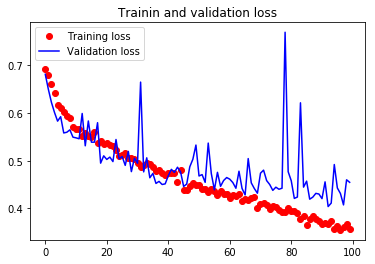

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")

plt.figure()

plt.plot(epochs, loss, 'ro', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Trainin and validation loss")
plt.legend()
plt.show()
